# **EDA - Exploratory Data Analysis**

EDA é a análise exploratória de dados, mas o que é isso? Em sua essencia é analisar bases de dados com o intuito de extrair insights, informações úteis dos dados.

Consiste em um exploração descritiva dos dados, tais como verificar registros e valores faltantes até uma análise visual, que facilita a interpretação.

Técnicas estatísticas são utilizadas, como analisar a distribuição dos dados, validação de hipóteses, verificar a correlação dos dados, dispersão entre outras.

Mas antes da etapa de EDA, precisamos ter dados validados, ou seja, dados confiáveis para análises verdadeiras, pra isso utilizaremos uma amostra dos dados por ano, 2017, 2018 e 2019 de Reclamações de consumidores do site consumidor.gov.br

Para começar, precisamos conhecer um pouco do negócio e entender o que significa cada feature e para isso tem um PDF no próprio site, no qual explica cada uma.

Os dados foram tirados deste site: https://www.consumidor.gov.br/pages/dadosabertos/externo/

Foram retirados aleatoriamente uma amostra de cada ano

# Importar as bibliotecas

In [1]:
# manipulação dos dados
import numpy as np
import pandas as pd

# visualização dos dados
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
% matplotlib inline

# ignorar mensagens de warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Primeiras impressões**

In [0]:
# importando o conjunto de dados
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_files/RegistroReclamacaoAmostra.csv', sep=';')

In [3]:
df.head()

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
0,CO,DF,Brasília,F,entre 31 a 40 anos,27/01/2018,7.0,Oi Celular,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Pacote de Serviços ( Combo ),Cobrança / Contestação,Cobrança após cancelamento do serviço,Internet,S,S,Finalizada avaliada,Resolvida,3.0,1
1,SE,SP,Guarulhos,M,entre 21 a 30 anos,23/01/2018,10.0,SKY,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,TV por Assinatura,Atendimento / SAC,SAC - Demanda não resolvida / não respondida /...,Loja física,S,S,Finalizada avaliada,Resolvida,3.0,1
2,SE,SP,São Paulo,M,entre 31 a 40 anos,27/01/2018,7.0,Bradesco Cartões,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Cartão de Crédito / Cartão de Débito / Cartão ...,Cobrança / Contestação,Cobrança em duplicidade / Cobrança referente a...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,3.0,1
3,NE,PE,Recife,M,entre 31 a 40 anos,18/01/2018,2.0,Banco Cetelem,"Bancos, Financeiras e Administradoras de Cartão",Demais Serviços,"Programas de Fidelidade / Benefícios (pontos, ...",Cobrança / Contestação,"Cobrança de tarifas, taxas, valores não previs...",Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,2.0,1
4,CO,MT,Sinop,M,entre 21 a 30 anos,20/01/2018,7.0,Banco do Brasil,"Bancos, Financeiras e Administradoras de Cartão",Serviços Financeiros,Atendimento Bancário,Cobrança / Contestação,Cobrança indevida / abusiva para alterar ou ca...,Não comprei / contratei,S,S,Finalizada avaliada,Não Resolvida,5.0,1


In [4]:
# verificando tipo de cada features
# verificando a quantidade em cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930622 entries, 0 to 930621
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Região                  930622 non-null  object 
 1   UF                      930622 non-null  object 
 2   Cidade                  930622 non-null  object 
 3   Sexo                    930622 non-null  object 
 4   Faixa Etária            930622 non-null  object 
 5   Data Finalização        930622 non-null  object 
 6   Tempo Resposta          923030 non-null  float64
 7   Nome Fantasia           930622 non-null  object 
 8   Segmento de Mercado     930622 non-null  object 
 9   Área                    930622 non-null  object 
 10  Assunto                 930622 non-null  object 
 11  Grupo Problema          930622 non-null  object 
 12  Problema                930622 non-null  object 
 13  Como Comprou Contratou  930622 non-null  object 
 14  Procurou Empresa    

**Análise:** temos 930.622 registros com 20 colunas, podemos observar que a maioria é do tipo "Objeto" e notamos que temos alguns dados faltantes.

In [5]:
# Verificando quais colunas possuem dados faltantes e sua quantidade
df.isnull().sum()

Região                         0
UF                             0
Cidade                         0
Sexo                           0
Faixa Etária                   0
Data Finalização               0
Tempo Resposta              7592
Nome Fantasia                  0
Segmento de Mercado            0
Área                           0
Assunto                        0
Grupo Problema                 0
Problema                       0
Como Comprou Contratou         0
Procurou Empresa               0
Respondida                     0
Situação                       0
Avaliação Reclamação           0
Nota do Consumidor        394089
Total                          0
dtype: int64

**Análise:** Faltando dados em tempo na resposta e na nota do consumidor. Podemos notar que o número faltante de notas é bem alto.

# **Quais perguntas queremos responder com esta análise?**

1. Há diferença na quantidade de reclamações por sexo?
2. Qual a proporção de reclamações por faixa etária?
3. Quais problemas são mais comuns e o segmento mais afetado?
4. A nota do consumidor é correlacionado com o tempo de resposta?
5. Qual a proporção de reclamações não resolvidas?
6. As reclamações são distribuídas em todo o Brasil ou existe alguma concentração em determinadas regiões?
7. Como as reclamações estão distribuídas ao longo dos anos e meses?
8. Há um dia específico para finalizar as reclamações?

# **Análise Exploratória**

## 1.1 Quantidade de reclamação por sexo

In [6]:
df['Sexo'].value_counts(dropna=False, normalize=True) # o parâmetro dropna=False mostrará se há valores faltantes também

M    0.585156
F    0.414844
Name: Sexo, dtype: float64

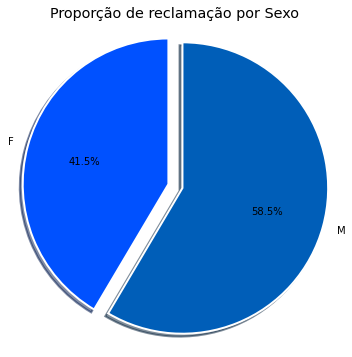

In [7]:
# verificando através de um gráfico
# criando a representação de plotagem
fig1, ax1 = plt.subplots(figsize=(6,6))

# definindo as cores
c = ['#0051ff', '#005eb8']

explode = (0.1, 0)

# criando o gráfico
ax1.pie(df.groupby(['Sexo'])['Sexo'].count().tolist(), labels=df.groupby(['Sexo'])['Sexo'].count().index, 
        autopct='%1.1f%%', shadow=True, startangle=90, colors=c, explode=explode,
        wedgeprops={"edgecolor":"white", 'linewidth': 2, 'antialiased': True})
plt.axis('equal')
plt.title('Proporção de reclamação por Sexo');

**Análise:** Temos uma proporção um pouco maior de homens do que mulheres.

## 2.1 Faixa etária dos consumidores

In [8]:
df.groupby(['Sexo'])['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    116322
      entre 21 a 30 anos    111648
      entre 41 a 50 anos     61432
      entre 51 a 60 anos     45601
      entre 61 a 70 anos     28988
      mais de 70 anos        12394
      até 20 anos             9678
M     entre 31 a 40 anos    187573
      entre 21 a 30 anos    177146
      entre 41 a 50 anos     82330
      entre 51 a 60 anos     45567
      entre 61 a 70 anos     26233
      até 20 anos            14476
      mais de 70 anos        11234
Name: Faixa Etária, dtype: int64

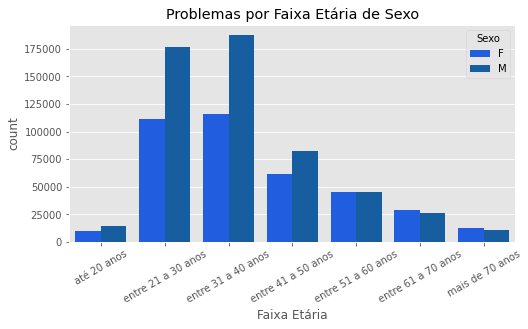

In [9]:
# criando a área de plotagem
plt.figure(figsize=(8,4))

# definindo as cores
c = ['#0051ff', '#005eb8']

# ordem das categorias
order = ['até 20 anos','entre 21 a 30 anos','entre 31 a 40 anos','entre 41 a 50 anos','entre 51 a 60 anos','entre 61 a 70 anos','mais de 70 anos']

# criando o gráfico
ax = sns.countplot(x='Faixa Etária', data=df, hue='Sexo', order=order, palette=c)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Problemas por Faixa Etária de Sexo');

**Análise:** A média de idades com mais reclamações, ambos os sexos, é entre 31 a 40 anos.
Podemos observar que as faixas com menos reclamações são os dois extremos (abaixo de 20 anos e mais de 70 anos), com isso podemos obter outros insights:
- Será que esse público não tem problemas?
- Pessoas até 20 anos, não se preocupam com esses problemas?
- Pessoas com mais de 70 anos pode ter problemas de acessibilidade?

Obs.: Esses tipos de informações a mais, os dados não nos fornecem.

## 3.1 Quais os problemas mais comuns?

In [10]:
df['Grupo Problema'].value_counts()

Cobrança / Contestação    390229
Contrato / Oferta         163616
Vício de Qualidade        125883
Atendimento / SAC         106999
Informação                 99518
Entrega do Produto         39710
Saúde e Segurança           4667
Name: Grupo Problema, dtype: int64

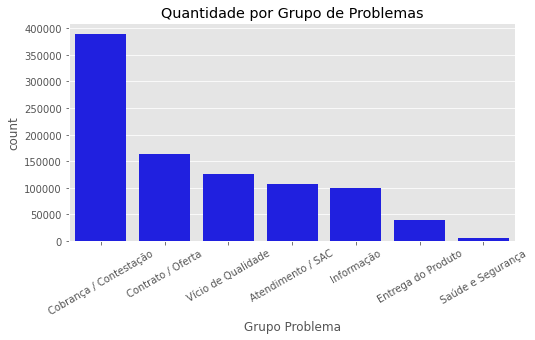

In [11]:
# criando a área de plotagem
plt.figure(figsize=(8,4))

# definindo as cores
c = ['#0051ff', '#005eb8']

# ordem das categorias
order = df['Grupo Problema'].value_counts().index

# criando o gráfico
ax = sns.countplot(x='Grupo Problema', data=df, color='b', order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Quantidade por Grupo de Problemas');

**Análise:** O maior grupo de problemas é de "Cobrança / Contestação", os demais estão quase que na mesma proporção (com excessão também dos dois últimos). Mas quais os tipos de problemas do maior grupo?

In [12]:
# Filtrando pelo maior grupo encontrado e extratificando os problemas relacionados
df[df['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Cobrança indevida / abusiva para alterar ou cancelar o contrato                                           75863
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            70502
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      41958
Renegociação / parcelamento de dívida                                                                     29653
Cobrança de tarifas, taxas, valores não previstos / não informados                                        28214
Cobrança após cancelamento do serviço                                                                     24142
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                         20477
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                      19270
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                        

**Análise:** Basicamente, os dois maiores problemas são: cobrança indevida e cobrança por serviço não contratado.

## 3.2 Qual segmento mais afetado?

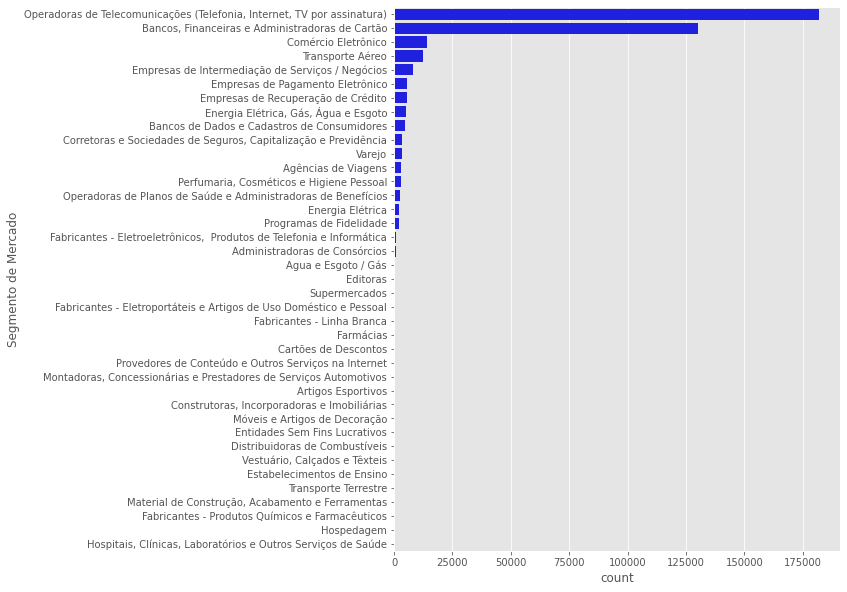

In [13]:
# filtrando pelo maior grupo de Problemas
maiorProblema = df[df['Grupo Problema'] == 'Cobrança / Contestação']

# Contando pelo segmento
x = maiorProblema['Segmento de Mercado'].value_counts()

# criando um gráfico de barras horizontais
# definindo o tamanho da área de plotagem
plt.figure(figsize=(8,10))

# ordenando as categorias
order = maiorProblema['Segmento de Mercado'].value_counts().index

# criando o plot
sns.countplot(y='Segmento de Mercado', data=maiorProblema, color='b', order=order);

**Análise:** As operadoras de telecomunicações disparam no rank de reclamações seguido pelas agências bancárias e de crédito. Vamos dar uma olhada quais são as empresas.

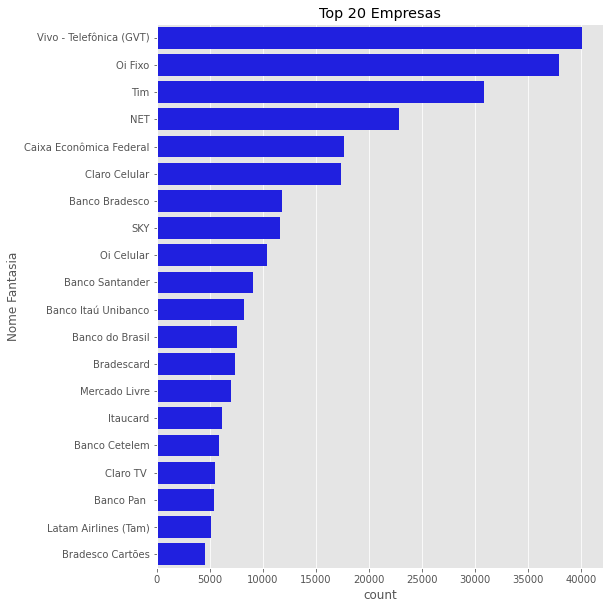

In [14]:
# maiorProblema['Nome Fantasia'].value_counts()[:20]

# criando um gráfico de barras horizontais
# definindo o tamanho da área de plotagem
plt.figure(figsize=(8,10))

# ordenando as categorias
order=maiorProblema['Nome Fantasia'].value_counts()[:20].index

# criando o plot
sns.countplot(y='Nome Fantasia', data=maiorProblema, order=order, color='b')
plt.title('Top 20 Empresas');

## 4.1 A nota do consumidor tem a ver com o tempo de resposta?

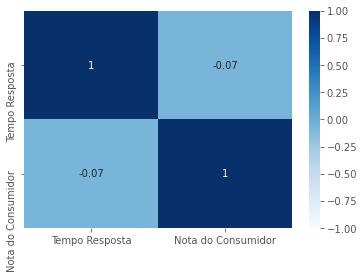

In [15]:
# analisando se há correlação entre o Tempo Resposta (independente) e Nota do Consumidor (dependente) com heatmap
sns.heatmap(df[['Tempo Resposta', 'Nota do Consumidor']].corr(), vmin=-1, vmax=1, annot=True, cmap="Blues");

**Análise:** De acordo com o heatmap, utilizando a correlação de pearson que vai de -1 (correlação negativa forte) à 1 (correlação positiva forte), podemos verificar que a correlação é de -0.07, significa que quanto mais próximo de 0.00, indica que não há correlação, interpretando o gráfico, há uma correlação negativa estremamente fraca, ou podemos afirmar que não correlação entre as variáveis.

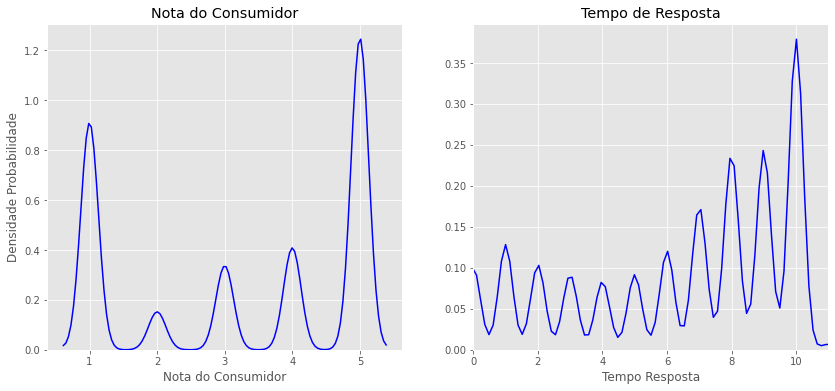

In [16]:
# criando a representação de plotagem
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))

# criando o gráfico 1
sns.distplot(df['Nota do Consumidor'], hist=False, color='b', ax=ax1)
ax1.set_ylabel('Densidade Probabilidade')
ax1.set_title('Nota do Consumidor')

# criando o gráfico 2
sns.distplot(df['Tempo Resposta'], hist=False, color='b', ax=ax2)
ax2.set_xlim([0,11])
ax2.set_title('Tempo de Resposta');

**Análise:** Analisando os dois gráficos separadamente, observamos que no primeiro gráfico, a maior concentração das notas estão em 1 e 5 e no tempo de resposta entre 8 e 10 dias. Isso explica a baixa correlação, pois os valores não estão distribuídos e sim nos extremos de cada.

## 5.1 Qual a proporção das respostas não resolvidas?

In [17]:
df['Avaliação Reclamação'].value_counts(normalize=True) # proporção

Não Avaliada     0.423468
Resolvida        0.384872
Não Resolvida    0.191660
Name: Avaliação Reclamação, dtype: float64

In [0]:
# fazendo uma contagem por segmento de mercado
x = df.groupby(['Segmento de Mercado'])['Segmento de Mercado'].count()

# filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

# filtrando com base dos atributos filtrados
df20 = df[df['Segmento de Mercado'].isin(x.keys())]

# filtrando por reclamações não resolvidas
df20 = df[df['Avaliação Reclamação'] == 'Não Resolvida']

# agrupando novamente somente com os atributos de interesse
x1 = df20.groupby(['Segmento de Mercado'])['Segmento de Mercado'].count()

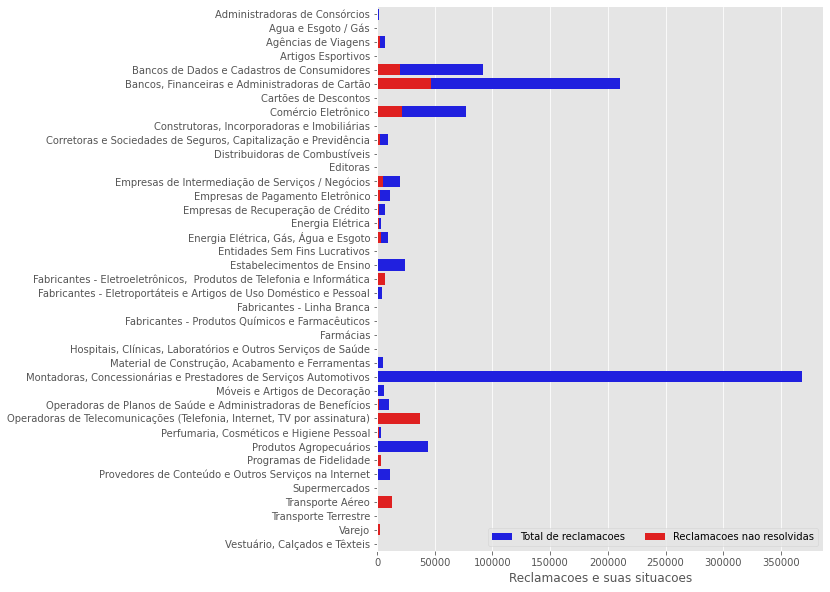

In [19]:
# Criando a representação de plotagem
f, ax = plt.subplots(figsize=(8, 10))

# criando os plots
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamacoes", color="b")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamacoes nao resolvidas", color="r")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamacoes e suas situacoes")
sns.despine(left=False, bottom=True)

**Análise:** Podemos observar no gráfico que a proporção de "Não resolvidas" é relativamente baixa em relação ao total, mas se olharmos mais de perto, como por exemplo, "Bancos, Financeiras e Admnistradoras de Cartão" vimos que "Não resolvidas" representam aproximadamente 25% do total dessa categoria e isso equivale à próximo de 50.000 reclamações, muito não?

## 6.1 Como é a distribuição geográfica dessas reclamações no Brasil?

In [0]:
# primeiramente importaremos uma base do IBGE sobre municípios do Brasil com latitude e longitude
municipios = pd.read_excel('/content/drive/My Drive/Colab Notebooks/data_files/municipiosBrasil.xls')

In [21]:
municipios.head()

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,1,LATITUDE,-66.88,Mun/UF,ACRELANDIA,AC,39560.038911
1,2,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17842.150989
2,3,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,93373.394313
3,4,-9.83,-67.95,BUJARI - AC,BUJARI,AC,28516.567493
4,5,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18886.455136


In [0]:
# precisamos fazer um tratamento nos dados antes de prosseguir
# importando as bibliotecas
import unicodedata
import re

# criando algumas funções
def remover_acentos(text):
  nfkd=unicodedata.normalize('NFKD', text)

  # aplicando a normalização
  palavraNew = u"".join([c for c in nfkd if not unicodedata.combining(c)])

  # uso de regex para retornar apenas números, letras e espaço
  palavraNew = re.sub('[^a-zA-Z0-9 \\\]', '', palavraNew)

  # deixando todas as letras em maiúsculo
  palavraNew = str(palavraNew).upper()
  return palavraNew

# aplicando a função na coluna Cidade do nosso conjunto de dados original
df['Cidade2'] = df['Cidade'].apply(remover_acentos)

In [0]:
# # plotando o gráfico com a biblioteca folim
# # importando as bibliotecas necessárias
# import folium
# from folium import plugins

# # restringindo para o território brasileiro
# mapa = folium.Map(location=[-15.788497,-47.879873], zoom_start=5, tiles='Stamen Toner')

# # criando o mapeamento
# coordenadas=[]
# for cid,uf in zip(df.Cidade2[:20000],df.UF[:20000]):
#   cidadeUf = cid+' - '+uf
#   lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
#   long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
#   if lat != '' and long != '':
#     lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
#     long = float(str(long).replace('[','').replace(']','').replace(' ',','))
#   coordenadas.append([lat,long])
#   mapa.add_child(plugins.HeatMap(coordenadas))

# mapa

## 7.1 Como as reclamações estão distribuídas ao longo dos anos e meses?

Se o tempo de Resposta é o tempo que a empresa levou para responder a reclamação, em dias, quer dizer que se a gente tem a data da finalização, podemos conseguir a data da emissão da reclamação.

In [0]:
# convertendo str em formato data
df['Data Finalização'] = pd.to_datetime(df['Data Finalização'], format="%d/%m/%Y")

# subtraindo a data da finalização pela quantidade de dias para encerramento
df['Data Abertura'] = df['Data Finalização'] - pd.to_timedelta(df['Tempo Resposta'], unit='d')

In [0]:
# extraindo mais features relacionadas à datas
df['Ano Abertura'] = df['Data Abertura'].dt.year
df['Mes Abertura'] = df['Data Abertura'].dt.month
df['Dia Abertura'] = df['Data Abertura'].dt.day
df['Dia Semana Abertura'] = df['Data Abertura'].dt.dayofweek

Será que os dias da semana que as reclamações são abertas influenciam na demora da resposta?

In [0]:
# função para verificar se se é dia da semana ou final de semana
def convertFinalSemana(data):
  if data.dayofweek == 5 or data.dayofweek == 6:
    return 1
  else:
    return 0

# aplicando a função
df['Final Semana'] = df['Data Abertura'].apply(convertFinalSemana)

In [0]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/data_files/RegistroReclamacaoAmostraEDA.csv', index=False)

Será criado outro notebook para Machine Learning e análise de Série Temporal (TimeSeries)